## 01. Qiskit basics

If the instructions presented in the `README.md` file were correctly followed, **Qiskit** should be correctly installed. The following code will initialize **Qiskit**:

In [1]:
from qiskit import QuantumCircuit, transpile, Aer
from qiskit.tools.visualization import plot_histogram, plot_state_city

Let's start by generating a quantum circuit with only **two** qubits. To do this, we can use the `QuantumCircuit()` function:

In [2]:
# Generate a quantum circuit with 2 qubits
circuit = QuantumCircuit(2)

Obviously, the current circuit doesn't do anything yet.

It is worth mentioning that both qubits were initialized with the $\vert 0\rangle$ value: $\begin{cases}\vert q_0\rangle = \vert 0\rangle\\\vert q_1\rangle = \vert 0\rangle\end{cases}$

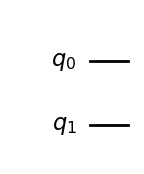

In [3]:
# Visualize the (empty) circuit
circuit.draw('mpl')

Let's now generate the third **Bell state**.

Can you recall the formula for this state? If not, here it is: $\vert \Psi^+\rangle = \dfrac{\vert 01\rangle + \vert 10\rangle}{\sqrt{2}}$

How can this be obtained? First, transform the $\vert q_0\rangle$ ket into $\vert +\rangle$ using a **Hadamard** gate and the $\vert q_1\rangle$ ket into $\vert 1\rangle$ using a **Pauli X (NOT)** gate:

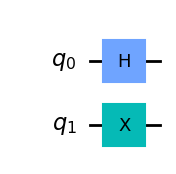

In [4]:
# Apply H gate on q0
circuit.h(0)
circuit.x(1)
circuit.draw('mpl')

We are currently looking at $\frac{1}{\sqrt{2}}\big(\vert 0\rangle + \vert 1 \rangle\big) \otimes \vert 1\rangle$. By applying one last operation, a **controlled NOT (CNOT)** gate between these two kets, we will finally achieve our Bell state:

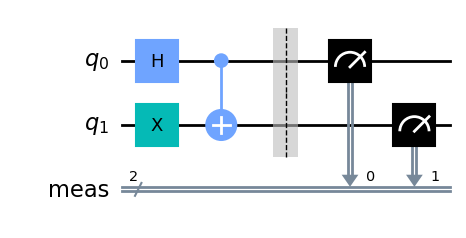

In [5]:
circuit.cx(0, 1)
circuit.measure_all()
circuit.draw('mpl')

As you can tell, we have introduced the measurement operation as well.

**Q:** What results do we expect to get when we run the simulation?
    
**A:** Since $\vert \Psi^+\rangle = \dfrac{\vert 01\rangle + \vert 10\rangle}{\sqrt{2}}$, we expect about 50% of the results to be $\vert 01\rangle$ and the rest of them to be $\vert 10\rangle$.

Let's now run the simulation and check if our prediction was correct:

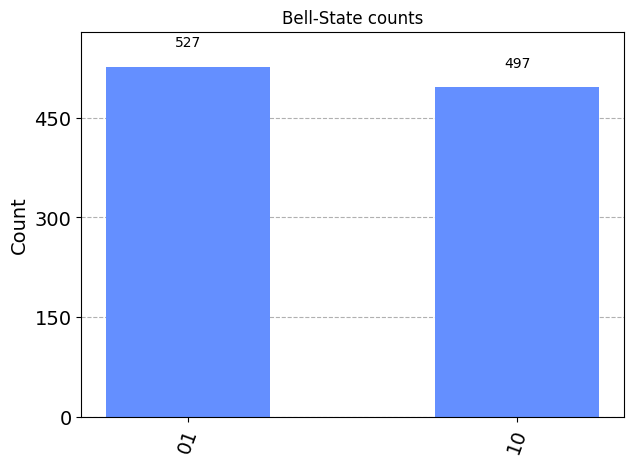

In [6]:
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circuit, simulator)
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')

We were close, weren't we?

Now try to implement the circuit that is responsible for the second Bell state, $\vert \Phi^-\rangle = \dfrac{\vert 00\rangle - \vert 11\rangle}{\sqrt{2}}$

**Hint:** Start with the $\vert 10\rangle$ state.

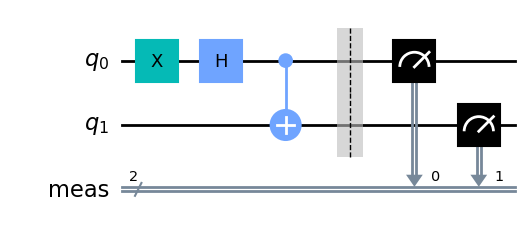

In [7]:
# Generate a quantum circuit with 2 qubits
circuit = QuantumCircuit(2)

# Implement the logic behind the second Bell state
circuit.x(0)
circuit.h(0)
circuit.cx(0,1)

# Visualize the circuit (with measurements enabled)
circuit.measure_all()
circuit.draw('mpl')

When ready, check that your simulation correctly outputs the expected measurements:


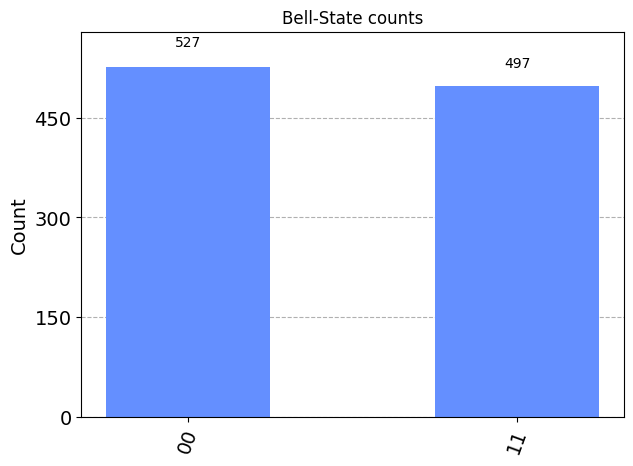

In [8]:
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circuit, simulator)
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')

## 02. Swaps and phase shifts

Let's say we have two qubits, $\vert q_0\rangle$ and $\vert q_1\rangle$. How can we swap their values? Informally, how can we accomplish $\vert q_0\rangle\leftrightarrow\vert q_1\rangle$?

It turns out that this operation can be performed using three **CNOT** gates, written in the following configuration:

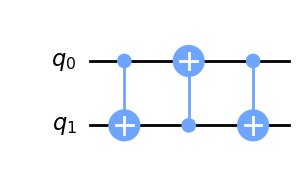

In [9]:
# Generate a quantum circuit with 2 qubits
circuit = QuantumCircuit(2)

# Insert the CNOT gates
circuit.cx(0, 1)
circuit.cx(1, 0)
circuit.cx(0, 1)

# Visualize the circuit
circuit.draw('mpl')

Let's verify this circuit's correctness for $\vert 01\rangle$ (we expect it to get converted into $\vert 10\rangle$):

1. Since $\vert q_0\rangle$ is, at this point, $\vert 0\rangle$, the first CNOT gate **will not** be activated;
2. However, $\vert q_1\rangle=\vert 1\rangle$, so the second CNOT gate **will** open and update $\vert q_0\rangle$ to $X\vert q_0\rangle=\vert 1\rangle$;
3. Finally, since $q_0\rangle$ is now $\vert 1\rangle$, the last CNOT gate **will** also open, converting $\vert q_1\rangle$ into $X\vert q_1\rangle=\vert 0\rangle$.

So, indeed, we obtained $\vert q_0q_1\rangle\rightarrow\vert q_1q_0\rangle$.

**Q:** Can you work out a similar reasoning for $\vert 11\rangle$?

This operation is used extensively throughout the quantum world, so a simplified notation can be used instead:

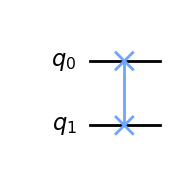

In [10]:
# Generate a quantum circuit with 2 qubits
circuit = QuantumCircuit(2)

# Swap the qubits
circuit.swap(0, 1)

# Visualize the circuit
circuit.draw('mpl')

Moving on to phase shifts - these are operations that map the basis states $\vert 0\rangle\rightarrow\vert 0\rangle$ and $\vert 1\rangle\rightarrow e^{i\varphi}\vert1\rangle$. Presented in matrix form, the shifts can be written as:

$$P(\varphi)=\begin{bmatrix}1 & 0\\0 & e^{i\varphi} \end{bmatrix}$$

If we were to compute the probabilities of measuring $\vert 0\rangle$ or $\vert 1\rangle$ for a given qubit, we would soon realize that they **remain unchanged**. However, the phase shift, as the name suggests, modifies the phase of the quantum state. This is equivalent to tracing a rotation along the Z axis on the **Bloch sphere** by $\varphi$ radians.

For now, this might seem insignificant. However, we will disprove this in the following subsections. Until then, let's see how does such an operation look like in Qiskit:

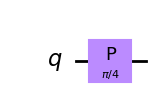

In [11]:
# Generate a quantum circuit with 1 qubit
circuit = QuantumCircuit(1)

# Rotate the qubit by pi/4 radians
pi = 3.14159265359
circuit.p(pi/4, 0)

# Visualize the circuit
circuit.draw('mpl')

Another version of this transform is the **controlled phase shift (CP)** gate. As you are accustomed by now, the controlled version takes two qubits as input and modifies the second one based on the $\vert 1\rangle$ component of the first one.

Another way to put it is using the matrix notation:

$$CP(\varphi) = \begin{bmatrix}1 & 0 & 0 & 0\\ 0 & 1 & 0 & 0\\ 0 & 0 & 1 & 0\\0 & 0 & 0 & e^{i\varphi} \end{bmatrix}$$

Let's check it out in Qiskit:

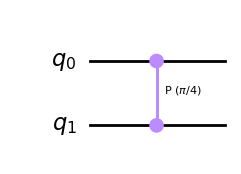

In [12]:
# Generate a quantum circuit with 1 qubit
circuit = QuantumCircuit(2)

# Rotate the qubit by pi/4 radians
pi = 3.14159265359
circuit.cp(pi/4, 0, 1)

# Visualize the circuit
circuit.draw('mpl')

## 03. Quantum Fourier Transform (QFT)

We are now ready to learn about one of the most important algorithms in the whole quantum realm - the notorious **Quantum Fourier Transform (QFT)**.

The algorithm was initially discovered in **June 1994** internally, in an IBM Research Division, by an American mathematician, **Don Coppersmith**. This procedure provided a breakthrough for the famous **Shor** algorithm (developed later that year).

In this section, we will discuss how the transform really works and how it can be useful.

The purpose of the QFT is to map a given ket $\vert X\rangle=\sum_{j=0}^{N-1}x_j\vert j\rangle$ to another vector, $\vert Y\rangle=\sum_{k=0}^{N-1}y_k\vert k\rangle$, such that the following formula holds true:

$$\boxed{y_k=\frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_j\cdot\omega_N^{jk}}\,,\text{ where } \omega_N^{jk}=\exp\left(2\pi i\cdot\frac{jk}{N}\right)$$

Equivalently, the formula above can be expressed as:

$$\vert j\rangle\rightarrow\frac{1}{\sqrt{N}}\sum_{k=0}^{N-1}\omega_N^{jk}\vert k\rangle$$

### Intuition

We will work towards building a **visual intuition** instead of only applying the math concepts.

First of all, we can think about the QFT as a black box that gets a **state in the computational basis** as an input ($\vert x\rangle$) and spits out (outputs) a **state in the Fourier basis** ($\vert \tilde x\rangle$). Since this operation is valid in the quantum realm, we can be sure that there exists a **unitary transformation**, let's say $QFT$, that can convert between those two basis:

$$QFT\vert x\rangle = \vert \tilde x\rangle$$

Qiskit actually [provides a great visualization](https://learn.qiskit.org/course/ch-algorithms/quantum-fourier-transform) of how _counting_ in the computational basis state affects the Fourier state.

Let's start by showing the computational basis output - pay attention to the frequency with which different qubits change:

![image.png](https://learn.qiskit.org/content/v2/ch-algorithms/images/zbasis-counting.gif)

_Note: the least significant (qu)bit is on the left_

As you can see from the representation above, the leftmost qubit filps on each increment, the next flips on every 2 increments, the third with every 4 increments and so on.

Now take a look at the Fourier basis; in this case, we store numbers using different quantifiable rotations around the Z-axis:

![image.png](https://learn.qiskit.org/content/v2/ch-algorithms/images/fourierbasis-counting.gif)

This time, each qubit starts from the $\vert +\rangle$ state and gets rotated according to the following formula when a number $x$ is stored:

$$\frac{x}{2^{n-k}}\cdot 2\pi \text{ radians}$$

For example, the leftmost qubit (so $k=0$) will get rotated $\frac{x}{2^{n}}=\frac{x}{2^{4}}=\frac{x}{16}$ full turns in order to store the value $x$, while the rightmost qubit ($k=3$) will simply flip, since $\frac{x}{2^1}=\frac{x}{2}$.

### The math

Consider the $\vert x\rangle = \vert x_1\dots x_n\rangle$ state, where $\vert x_1\rangle$ denotes the most significant bit. We know that $\vert x\rangle = \vert x_1\dots x_n\rangle\in\big\{\vert 0_1\dots 0_n\rangle, \vert 0_1\dots 1_n\rangle,\dots,\vert 1_1\dots 1_n\rangle\big\}$, so it might be useful to consider the total number of possible kets as well, $N=2^n$.

The following formula can be derived (and should be trusted as-is) for the QFT operator:

$$QFT_N\vert x\rangle = \frac{1}{\sqrt{N}}\sum_{y=0}^{N-1}\omega_N^{xy}\cdot\vert y\rangle$$

Since we know that $\omega_N^{xy}=\exp\left(2\pi i\cdot\frac{xi}{N}\right)$ and $N=2^n$, we can reformulate:

$$QFT_N\vert x\rangle = \frac{1}{\sqrt{N}}\sum_{y=0}^{N-1}\exp\left(2\pi i\cdot\frac{xy}{2^n}\right)\cdot\vert y\rangle$$

Rewriting $y$ in fractional binary notation (**please note that we think of $y$ as a number, do not confuse it with $\vert y\rangle$**), that is $\frac{y}{2^n}=\sum_{k=1}^n\frac{y_k}{2^k}$, would yield:

$$QFT_N\vert x\rangle = \frac{1}{\sqrt{N}}\sum_{y=0}^{N-1}\exp\left(2\pi i\cdot x\sum_{k=1}^n\frac{y_k}{2^k}\right)\cdot\vert y\rangle$$

We now want to expand the exponential of a sum into a product of exponentials:

$$QFT_N\vert x\rangle = \frac{1}{\sqrt{N}}\sum_{y=0}^{N-1}\prod_{k=1}^n\exp\left(2\pi i\cdot x\frac{y_k}{2^k}\right)\cdot\vert y\rangle$$

Finally, this equation can be rearranged as a tensor product:

$$QFT_N\vert x\rangle = \frac{1}{\sqrt{N}}\bigotimes_{k=1}^{n}\left[\vert0\rangle + \exp\left(2\pi i\cdot \frac{x}{2^k}\right)\vert 1\rangle\right]$$

### Implementation notes

Let's consider the $\vert x_1\rangle$ ket. When the **Hadamard** gate is applied on it, the result is fairly obvious. However, the same result can be rewritten in the context of phase shifting - this can be achieved using the following formula:

$$H\vert x_1\dots x_n\rangle=\frac{1}{\sqrt{2}}\left[\vert0\rangle + \exp\left(2\pi i\cdot \frac{x_1}{2^k}\right)\vert 1\rangle\right]\otimes\vert x_2x_3\dots x_n\rangle$$

Remember the $CP$ gate? Let's _rebrand it_ into something that is more useful in the current context. Thus, let's define $CROT_k$:

$$CROT_k = CP\left(\exp\left(\frac{2\pi i}{2^k}\right)\right) = \begin{bmatrix}1 & 0 & 0 & 0\\ 0 & 1 & 0 & 0\\ 0 & 0 & 1 & 0\\0 & 0 & 0 & \exp\left(\frac{2\pi i}{2^k}\right) \end{bmatrix}$$

When **deactivated**, so for $\vert 0 x_j\rangle$, the gate **does nothing**: $CROT_k\vert 0 x_j\rangle = \vert 0 x_j\rangle$. However, when **active**, the gate will modify the phase, as it was explained before, meaning that $CROT_k\vert 1 x_j\rangle = \exp\left(\frac{2\pi i}{2}\right)\vert 1 x_j\rangle$.

In the previous context of $H\vert x_1\dots x_n\rangle$, applying the $CP_2$ gate with control in qubit $2$ would only modify the phase of the $\vert 1\rangle$ ket:

$$\frac{1}{\sqrt{2}}\left[\vert0\rangle + \exp\left(\frac{2\pi i x_1}{2}+\frac{2\pi i x_2}{2^2}\right)\vert 1\rangle\right]\otimes\vert x_2x_3\dots x_n\rangle$$

This can continue by applying the $CP_3$ gate with control in qubit $3$, the $CP_4$ gate with control in qubit $4$ and so on, until $CP_n$ is reached:

$$\frac{1}{\sqrt{2}}\left[\vert0\rangle + \exp\left(\frac{2\pi i x_1}{2}+\dots+\frac{2\pi i x_n}{2^n}\right)\vert 1\rangle\right]\otimes\vert x_2x_3\dots x_n\rangle$$

However, since we know that $x=2^0x_n+\dots+2^{n-1}x_1$, the last equation can simply be rewritten as:

$$\frac{1}{\sqrt{2}}\left[\vert0\rangle + \exp\left(\frac{2\pi i x}{2^n}\right)\vert 1\rangle\right]\otimes\vert x_2x_3\dots x_n\rangle$$

Finally, doing this for all kets would result in the **QFT** formula already provided above.

### The implementation (3 qubits)

Let's start with a blank canvas containing 3 qubits:

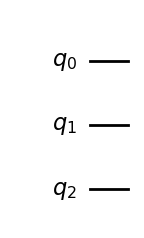

In [13]:
# Generate a quantum circuit with 3 qubits
pi = 3.14159265359
circuit = QuantumCircuit(3)

# Visualize the (empty) circuit
circuit.draw('mpl')

Since Qiskit's least significant bit has the lowest index (in other words, 0), the circuit must be **mirrored horizontally** in the end.

Until then, we can add the first part of the algorithm, containing the Hadamard gate for $\vert q_2\rangle$ and the $CP$ gates with control in $\vert q_1\rangle$ and $\vert q_0\rangle$ (again, don't forget that our reasoning must be flipped horizontally):

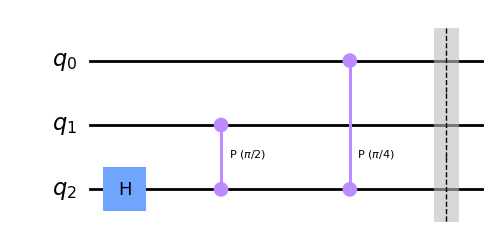

In [14]:
# Add the Hadamard gate
circuit.h(2)

# Add the CP gates
circuit.cp(pi/2, 1, 2)
circuit.cp(pi/4, 0, 2)

# Visualize the circuit (add barrier for visibility)
circuit.barrier()
circuit.draw('mpl')

Next, we can repeat the same logic for the $\vert q_1\rangle$ ket:

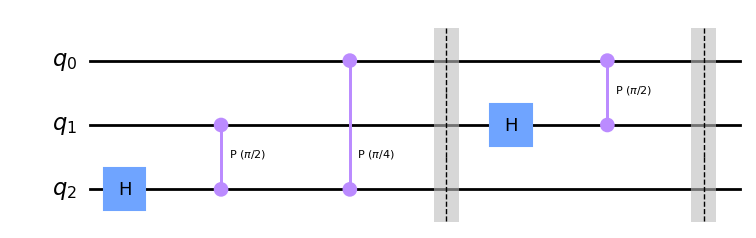

In [15]:
# Add the Hadamard gate
circuit.h(1)

# Add the CP gate
circuit.cp(pi/2, 0, 1)

# Visualize the circuit (add barrier for visibility)
circuit.barrier()
circuit.draw('mpl')

One last Hadamard gate shall be applied. In the end, as we've already established, the circuit must be flipped horizontally - in this case, $\vert q_0\rangle$ and $\vert q_2\rangle$ must be swapped:

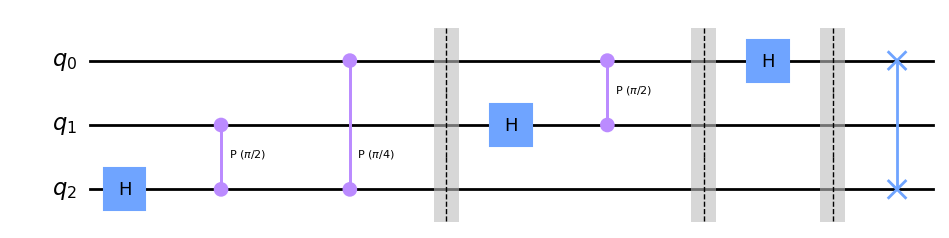

In [16]:
# Add the Hadamard gate (add barrier for visibility)
circuit.h(0)
circuit.barrier()

# Swap q0 and q2
circuit.swap(0, 2)

# Visualize the circuit
circuit.draw('mpl')

Obviously, the code can be generalized for $n$ qubits. This is your task:

In [20]:
# Generate the circuit for the i-th qubit, qi (i = 0..n-1)
def generate_qft_block(circuit, i):    
    # Add Hadamard gate
    circuit.h(i)
    
    # Add CP gates
    factor = 2
    for j in range(i-1, -1, -1):
        circuit.cp(pi/factor, j, i)
        factor = factor * 2

    # Add barrier and return
    circuit.barrier()
    return circuit
    
# Generate the whole circuit
def generate_qft(circuit, n):
    # Loop through all possible n values (n-1 -> 0) and
    # call generate_qft_block
    for i in range(n-1, -1, -1):
        generate_qft_block(circuit, i)
    
    # Finally, add swaps
    for i in range(0, n//2):
        circuit.swap(i, n-i-1)
    
    return circuit


To test your code, you can try to run the following:

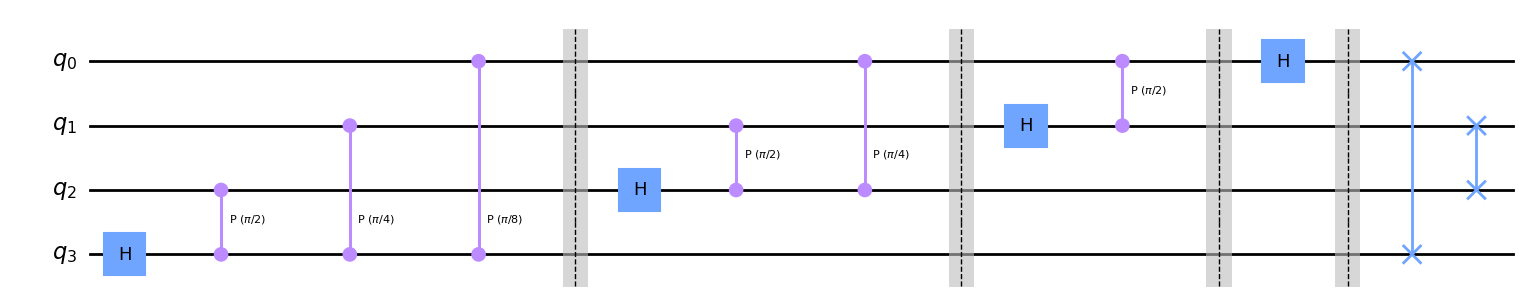

In [21]:
# Generate a quantum circuit with n qubits
n = 4
circuit = QuantumCircuit(n)
generate_qft(circuit, n)

# Visualize the (empty) circuit
circuit.draw('mpl')

## Bibliography

Our sources of inspiration are explained bellow:

1. [**IBM Research Report** - An Approximate Fourier Transform Useful in Quantum Factoring](https://arxiv.org/pdf/quant-ph/0201067.pdf);
2. [**Qiskit learn** - Quantum Fourier Transform](https://learn.qiskit.org/course/ch-algorithms/quantum-fourier-transform);